In [1]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import numpy as np

## Reading In Data

In [2]:
DATASETS_FOLDER_PATH = "C:/Users/Killian/Desktop/FYP-Multistage-Throughput-Predictor/Datasets/Raw/"
raw_data_path = DATASETS_FOLDER_PATH + "all_4G_data.csv"

raw_data = pd.read_csv(raw_data_path, index_col=None)

C:\Users\Killian\AppData\Local\Temp\ipykernel_22380\1448511203.py:4: DtypeWarning: Columns (8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_data = pd.read_csv(raw_data_path, index_col=None)


## Formatting Data

In [3]:
raw_data = raw_data.replace({"-":np.nan})

In [4]:
raw_data["Timestamp"] = pd.to_datetime(raw_data["Timestamp"], format="%Y.%m.%d_%H.%M.%S")
raw_data[["RSRQ", "SNR", "CQI", "RSSI", "NRxRSRP", "NRxRSRQ", "ServingCell_Distance", "ServingCell_Lat", "ServingCell_Lon"]] = raw_data[["RSRQ", "SNR", "CQI", "RSSI", "NRxRSRP", "NRxRSRQ", "ServingCell_Distance", "ServingCell_Lat", "ServingCell_Lon"]].astype(float)

In [5]:
raw_data.dtypes

Timestamp               datetime64[ns]
Longitude                      float64
Latitude                       float64
Speed                            int64
Operatorname                    object
CellID                           int64
NetworkMode                     object
RSRP                             int64
RSRQ                           float64
SNR                            float64
CQI                            float64
RSSI                           float64
DL_bitrate                       int64
UL_bitrate                       int64
State                           object
NRxRSRP                        float64
NRxRSRQ                        float64
ServingCell_Lon                float64
ServingCell_Lat                float64
ServingCell_Distance           float64
movement_type                   object
session                          int64
dtype: object

## Feature Explaination

While the dataset contains many potentially valuable features it is important to note how the dataset was constructed.
Most of the columns were collected directly from the device using the G-NetTrack App for android.
The following columns are widely reported on in the G-NetTrack App and thus measurements are available consistently
This includes:
 - Longitude
 - Latitude
 - Speed
 - Operatorname
 - NetworkMode
 - RSRP
 - RSRQ
 - SNR
 - CQI
 - DL_bitrate
 - UL_bitrate
 - State
 - NRxRSRP (Many missing values)
 - NRxRSRQ (Many missing values)

NRxRSRP and NRxRSRQ may not be subject to missing at random assumption as it is possible that there are no other serving towers nearby when nan is reported.

## Exploring Missing Values

<AxesSubplot: >

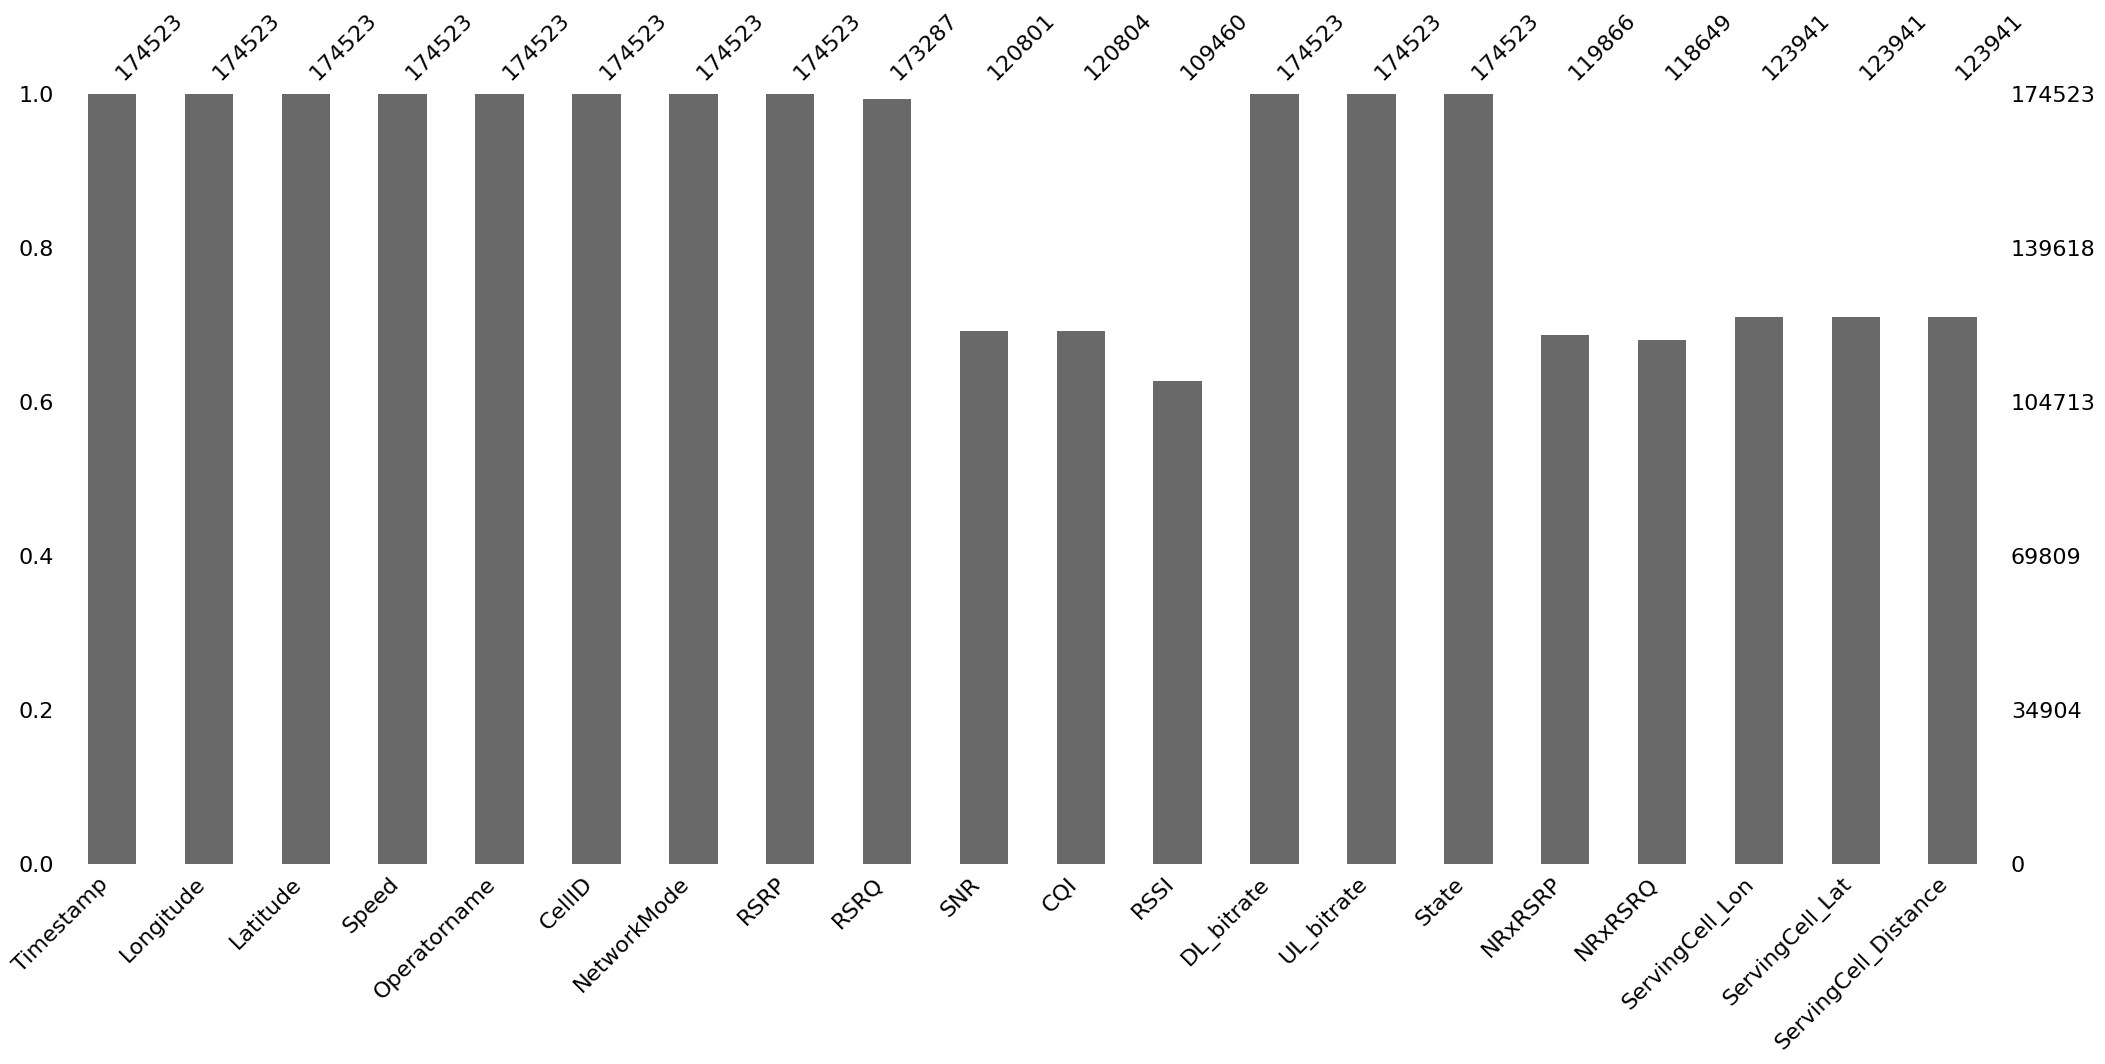

In [8]:
msno.bar(raw_data.drop(columns=["movement_type", "session"]))

In [11]:
nan_prop = raw_data.isna().mean()
print(nan_prop)

Timestamp               0.000000
Longitude               0.000000
Latitude                0.000000
Speed                   0.000000
Operatorname            0.000000
CellID                  0.000000
NetworkMode             0.000000
RSRP                    0.000000
RSRQ                    0.007082
SNR                     0.307822
CQI                     0.307805
RSSI                    0.372805
DL_bitrate              0.000000
UL_bitrate              0.000000
State                   0.000000
NRxRSRP                 0.313179
NRxRSRQ                 0.320153
ServingCell_Lon         0.289830
ServingCell_Lat         0.289830
ServingCell_Distance    0.289830
movement_type           0.000000
session                 0.000000
dtype: float64


<AxesSubplot: >

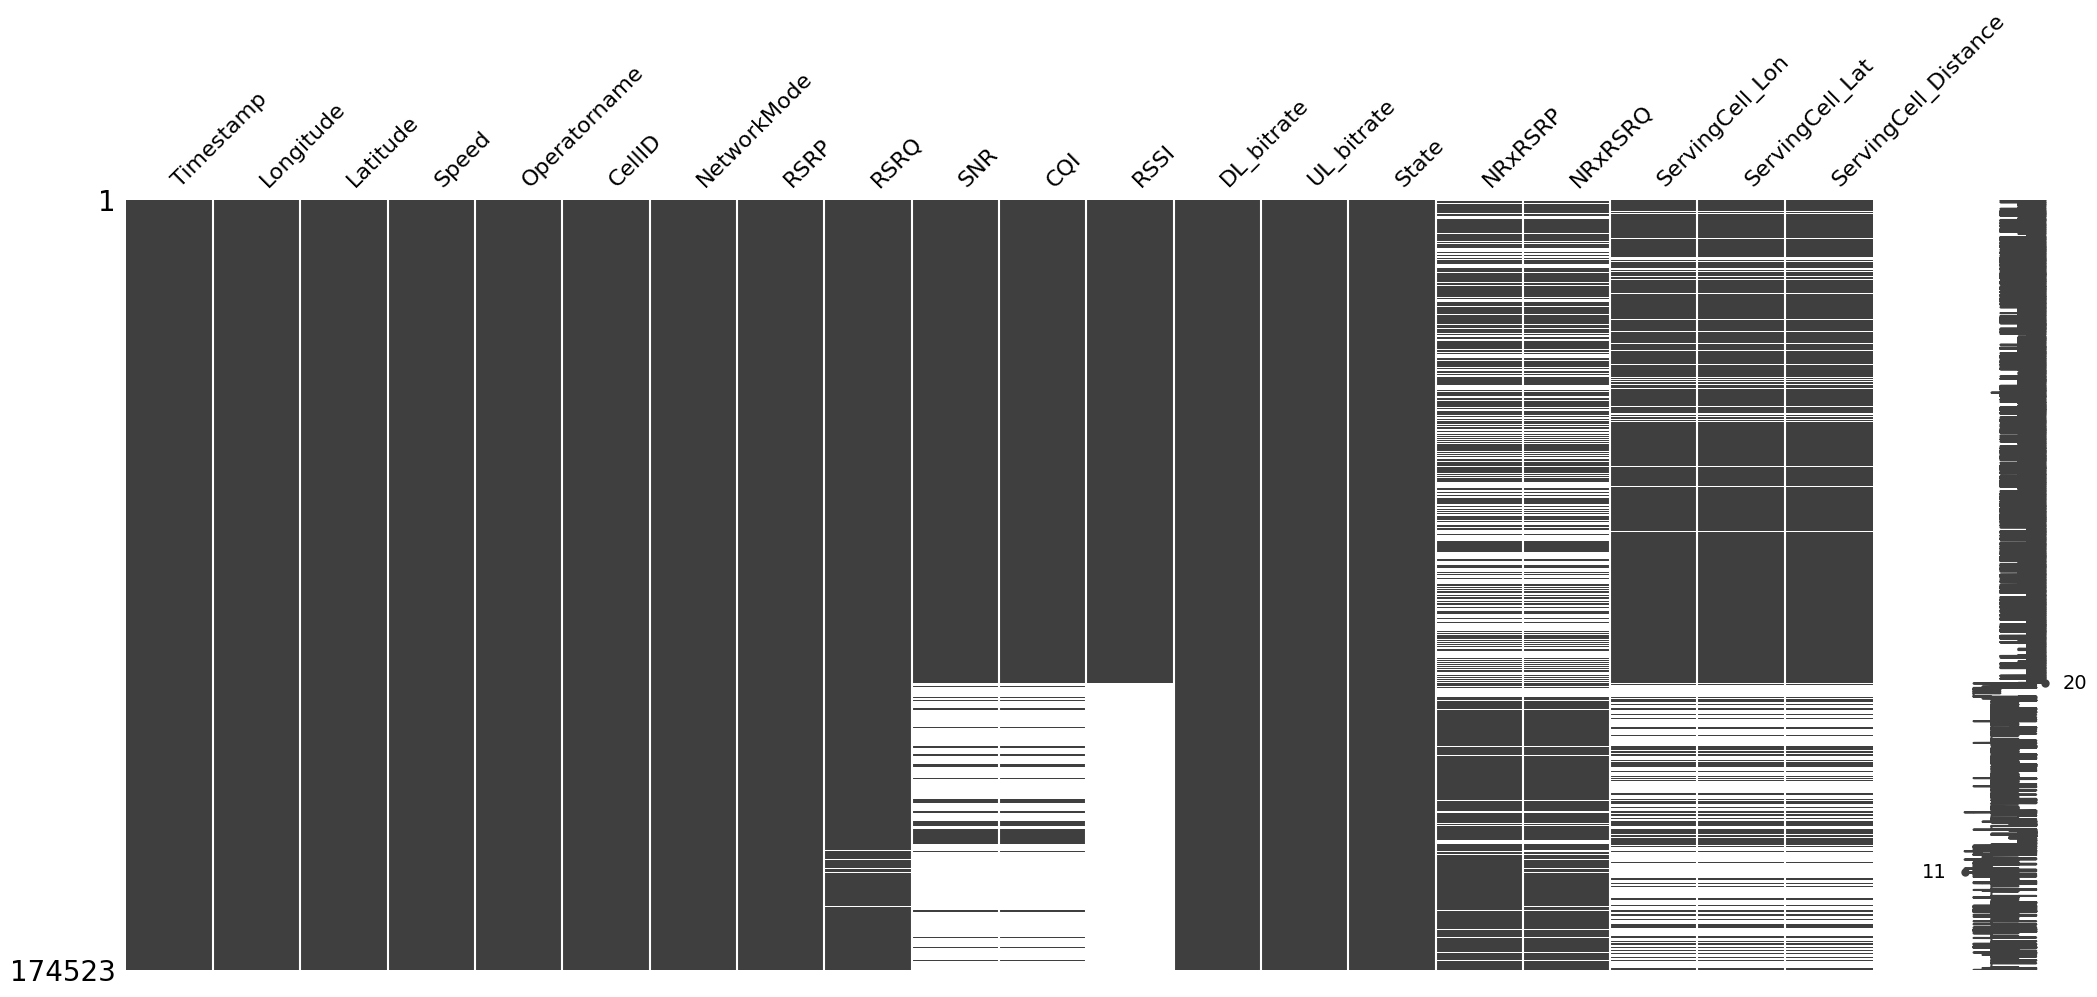

In [9]:
rssi_ordered_raw_data = raw_data.copy().sort_values("RSSI")
msno.matrix(rssi_ordered_raw_data.drop(columns=["session", "movement_type"]))

<AxesSubplot: >

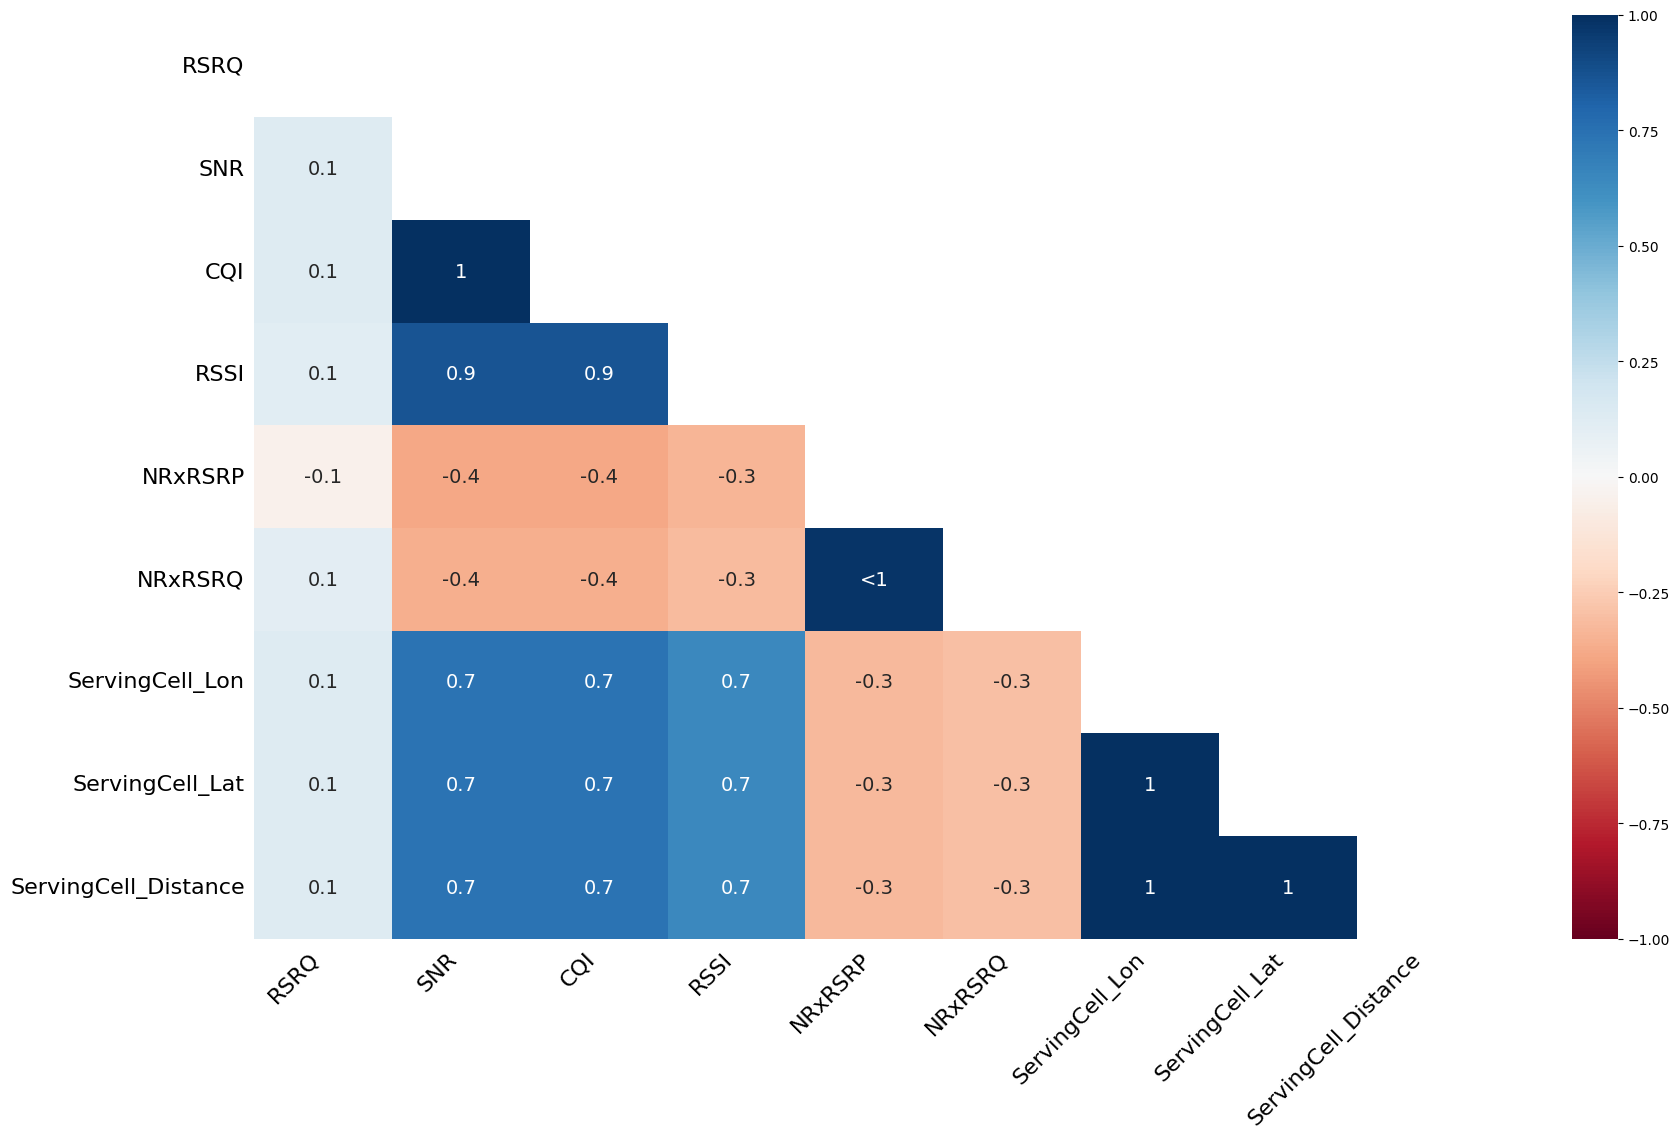

In [10]:
msno.heatmap(raw_data.drop(columns=["session", "movement_type"]))

## Distribution of Features

array([[<AxesSubplot: title={'center': 'Timestamp'}>,
        <AxesSubplot: title={'center': 'Longitude'}>,
        <AxesSubplot: title={'center': 'Latitude'}>,
        <AxesSubplot: title={'center': 'Speed'}>],
       [<AxesSubplot: title={'center': 'CellID'}>,
        <AxesSubplot: title={'center': 'RSRP'}>,
        <AxesSubplot: title={'center': 'RSRQ'}>,
        <AxesSubplot: title={'center': 'SNR'}>],
       [<AxesSubplot: title={'center': 'CQI'}>,
        <AxesSubplot: title={'center': 'RSSI'}>,
        <AxesSubplot: title={'center': 'DL_bitrate'}>,
        <AxesSubplot: title={'center': 'UL_bitrate'}>],
       [<AxesSubplot: title={'center': 'NRxRSRP'}>,
        <AxesSubplot: title={'center': 'NRxRSRQ'}>,
        <AxesSubplot: title={'center': 'ServingCell_Lon'}>,
        <AxesSubplot: title={'center': 'ServingCell_Lat'}>],
       [<AxesSubplot: title={'center': 'ServingCell_Distance'}>,
        <AxesSubplot: title={'center': 'session'}>, <AxesSubplot: >,
        <AxesSubplot: >

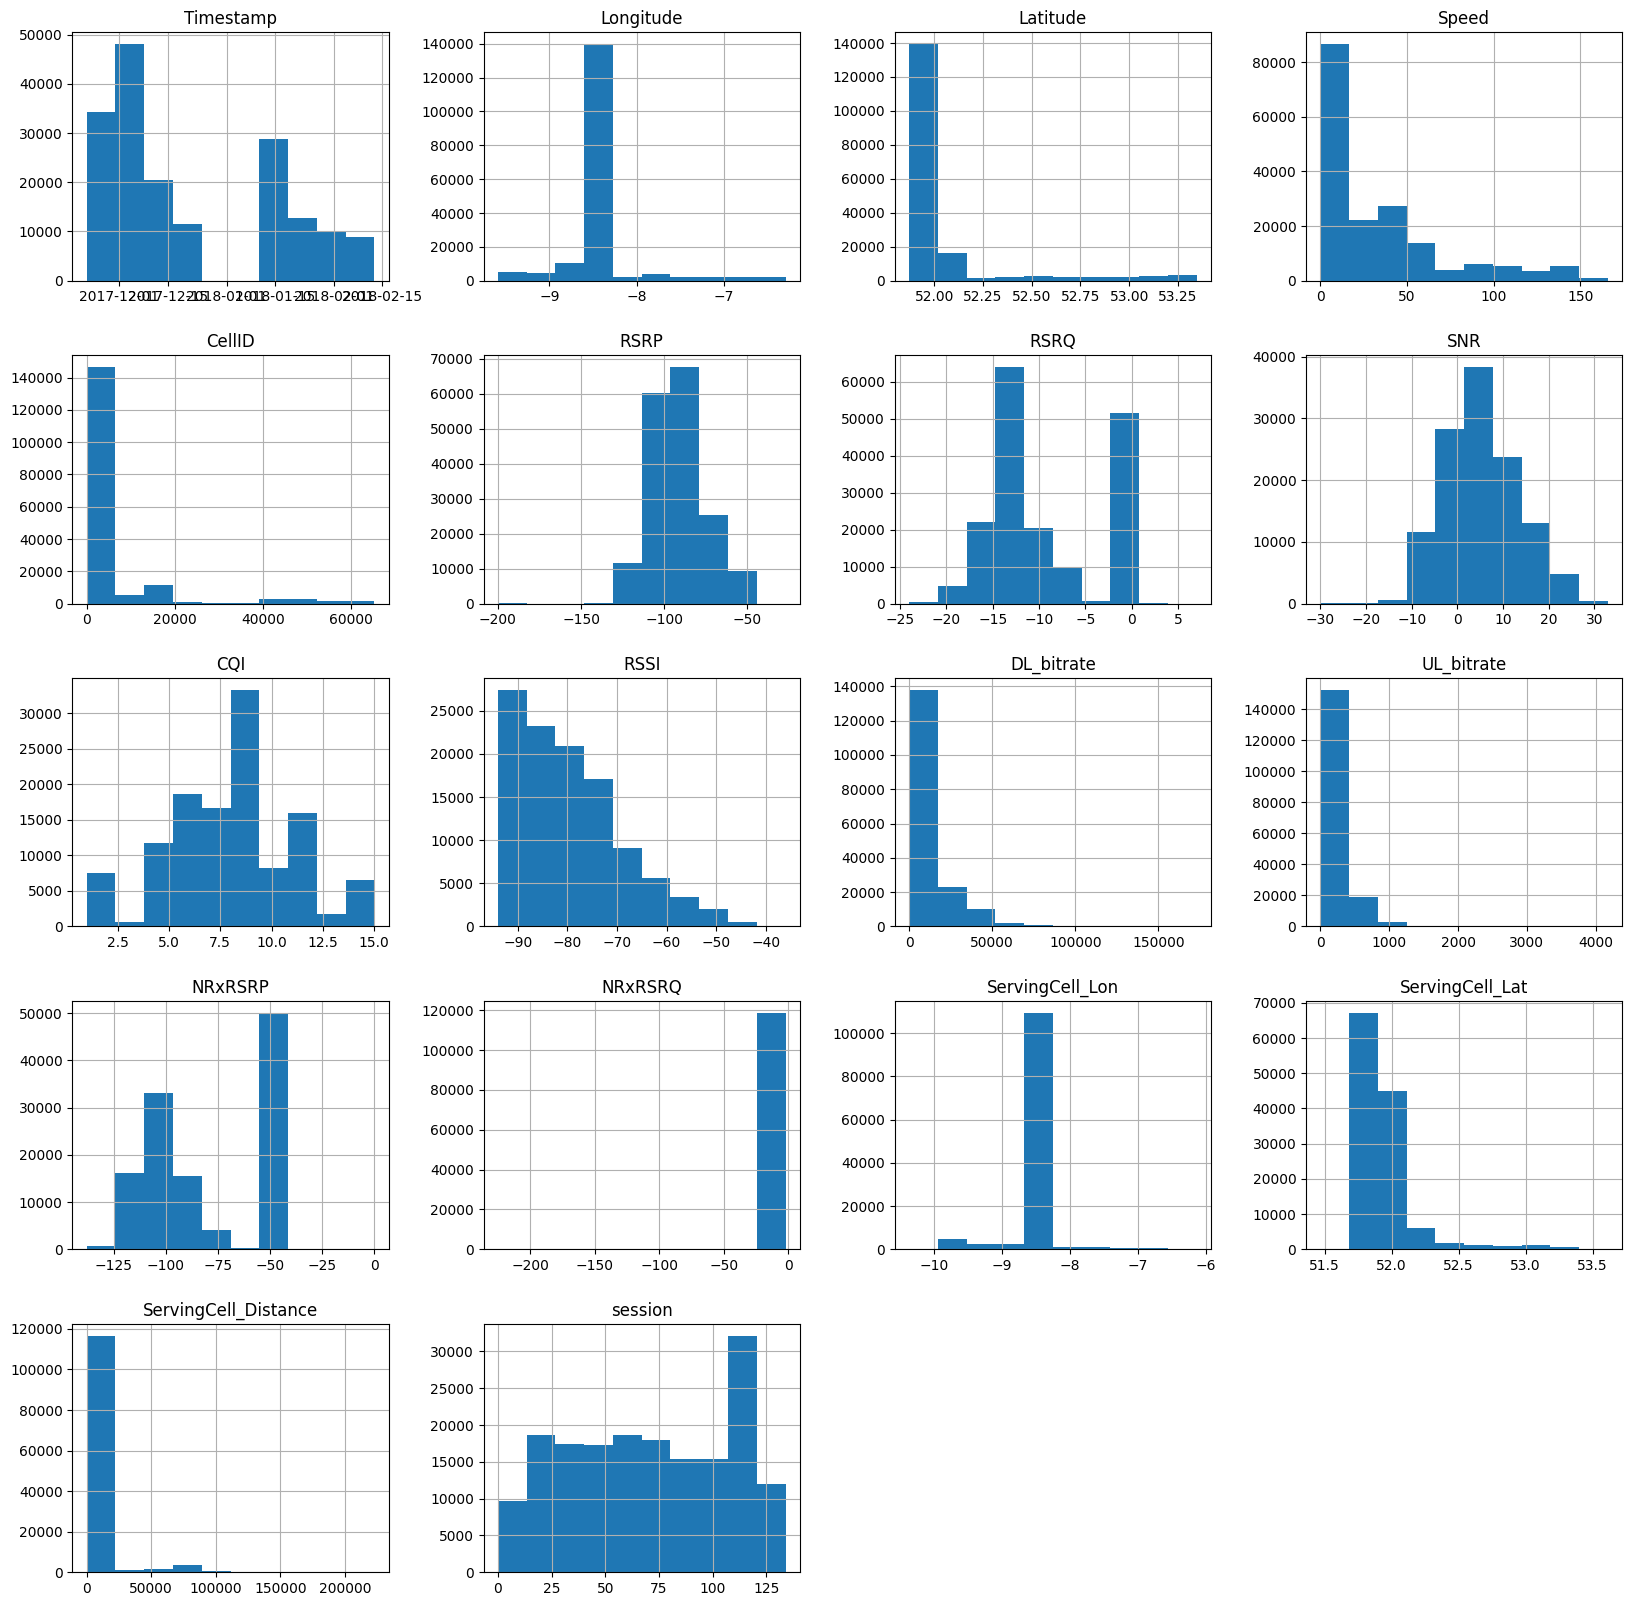

In [25]:
raw_data.hist(figsize=(20,20))

## Checking for Normality

In [26]:
from scipy.stats import shapiro
from statsmodels.graphics.gofplots import qqplot

In [27]:
def check_for_normality(dataframe=pd.DataFrame()):
    numeric_features = ["SNR", "CQI", "RSSI", "NRxRSRP", \
    "NRxRSRQ", "ServingCell_Distance", "Speed", "RSRQ", "RSRP", "DL_bitrate", "UL_bitrate"]
    for feature in numeric_features:
        print("Column", feature)
        stat, p = shapiro(dataframe[feature].to_numpy())
        print('Statistics=%.3f, p=%.3f' % (stat, p))
        if p > 0.05:
            print('{} looks Gaussian (fail to reject H0)'.format(feature), "\n===============\n")
        else:
            print('{} does not look Gaussian (reject H0)'.format(feature), "\n===============\n")


In [28]:
check_for_normality(raw_data)

Column SNR
Statistics=nan, p=1.000
SNR looks Gaussian (fail to reject H0) 

Column CQI
Statistics=nan, p=1.000
CQI looks Gaussian (fail to reject H0) 

Column RSSI
Statistics=nan, p=1.000
RSSI looks Gaussian (fail to reject H0) 

Column NRxRSRP
Statistics=nan, p=1.000
NRxRSRP looks Gaussian (fail to reject H0) 

Column NRxRSRQ
Statistics=nan, p=1.000
NRxRSRQ looks Gaussian (fail to reject H0) 

Column ServingCell_Distance
Statistics=nan, p=1.000
ServingCell_Distance looks Gaussian (fail to reject H0) 

Column Speed
Statistics=0.789, p=0.000
Speed does not look Gaussian (reject H0) 

Column RSRQ
Statistics=nan, p=1.000
RSRQ looks Gaussian (fail to reject H0) 

Column RSRP
Statistics=0.967, p=0.000
RSRP does not look Gaussian (reject H0) 

Column DL_bitrate
Statistics=0.737, p=0.000
DL_bitrate does not look Gaussian (reject H0) 

Column UL_bitrate
Statistics=0.766, p=0.000
UL_bitrate does not look Gaussian (reject H0) 



c:\Users\Killian\miniconda3\envs\tf\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


NaN values cause this function not to work properly therefore we must impute first

## Checking for Outliers

In [33]:
def check_for_outliers(dataframe=pd.DataFrame()):
    numeric_features = ["SNR", "CQI", "RSSI", "NRxRSRP", \
    "NRxRSRQ", "ServingCell_Distance", "Speed", "RSRQ", "RSRP", "DL_bitrate", "UL_bitrate"]
    for feature in numeric_features:
        print("Column", feature)
        q1 = dataframe[feature].quantile(0.25)
        q3 = dataframe[feature].quantile(0.75)
        iqr = q3 - q1
        df_outliers = dataframe[(dataframe[feature] < q1 - 1.5*iqr) | (dataframe[feature] > q3 + 1.5*iqr)][feature]
        print("No of outliers:", df_outliers.size)
        print(df_outliers, "\n===============\n\n")


In [34]:
check_for_outliers(raw_data)

Column SNR
No of outliers: 935
408       27.0
409       27.0
410       31.0
411       31.0
412       31.0
          ... 
169605    27.0
169606    27.0
169663   -30.0
169664   -30.0
169665   -30.0
Name: SNR, Length: 935, dtype: float64 


Column CQI
No of outliers: 0
Series([], Name: CQI, dtype: float64) 


Column RSSI
No of outliers: 828
409      -46.0
410      -48.0
411      -48.0
413      -46.0
414      -46.0
          ... 
119518   -47.0
119519   -47.0
119520   -47.0
161953   -43.0
161954   -45.0
Name: RSSI, Length: 828, dtype: float64 


Column NRxRSRP
No of outliers: 0
Series([], Name: NRxRSRP, dtype: float64) 


Column NRxRSRQ
No of outliers: 84
9457     -2.0
9458     -2.0
17874    -3.0
17875    -3.0
69582    -2.0
         ... 
174483   -3.0
174484   -3.0
174485   -3.0
174486   -3.0
174487   -3.0
Name: NRxRSRQ, Length: 84, dtype: float64 


Column ServingCell_Distance
No of outliers: 23502
374       11768.11
375       11870.83
376       11870.83
377       11870.83
378       11870

## Imputing the Missing Values

In [29]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer

In [30]:
def apply_scaler(dataframe=pd.DataFrame(), fit_only=False):
    numeric_features = ["SNR", "CQI", "RSSI", "NRxRSRP", \
    "NRxRSRQ", "ServingCell_Distance", "Speed", "RSRQ", "RSRP", "DL_bitrate", "UL_bitrate"]
    geo_features = ["Longitude", "Latitude", "ServingCell_Lon", "ServingCell_Lat"]
    features_to_scale = numeric_features + geo_features
    # isolate numeric features
    data_to_scale = dataframe[features_to_scale]
    scaler = MinMaxScaler((-1, 1))
    scaled_data = scaler.fit_transform(data_to_scale)
    if fit_only:
        # don't return dataframe here until preprocessor is refactored to ensure that ordering of features is applied else where in returned dataframe
        scaled_data = scaler.inverse_transform(scaled_data)
    dataframe[features_to_scale] = scaled_data
    return dataframe, scaler

In [31]:
def impute(dataframe=pd.DataFrame()):
    geo_features = ["Longitude", "Latitude", "ServingCell_Lon", "ServingCell_Lat"]
    categorical_features = ["Operatorname", "CellID", "NetworkMode", "State"]
    dataframe["CQI"].fillna(dataframe["CQI"].min(), inplace=True)
    dataframe["SNR"].fillna(dataframe["SNR"].min(), inplace=True)
    dataframe["RSSI"].fillna(dataframe["RSSI"].min(), inplace=True)
    dataframe[geo_features] = dataframe[geo_features].fillna(method="ffill")
    # Categorical features imputed using most frequent
    dataframe[categorical_features].fillna(dataframe[categorical_features].mode().iloc[0], inplace=True)
    movement_type = dataframe["movement_type"]
    dataframe = pd.get_dummies(dataframe.drop(columns=["movement_type"]))
    dataframe["movement_type"] = movement_type
    # NRxRSRP and NRxRSRQ require KNN-Imputation.
    require_KNN = ["NRxRSRP", "NRxRSRQ", "RSRP", "RSRQ"]
    if require_KNN:
        data_to_impute = dataframe.drop(columns=["Timestamp", "movement_type", "session"]).columns.tolist()
        imputer = KNNImputer(n_neighbors=5)
        dataframe[data_to_impute] = imputer.fit_transform(dataframe[data_to_impute])
    return dataframe

In [32]:
complete_data = raw_data.copy()
complete_data, scaler = apply_scaler(complete_data)
complete_data = impute(complete_data)
complete_data.to_csv("Imputed_data.csv", index=False, encoding="utf-8")

C:\Users\Killian\AppData\Local\Temp\ipykernel_7464\2975098901.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[categorical_features].fillna(dataframe[categorical_features].mode().iloc[0], inplace=True)


In [ ]:
complete_data.hist(figsize=(20,20))

## Checking for Normality in Imputed Data

In [35]:
check_for_normality(complete_data)

Column SNR
Statistics=0.849, p=0.000
SNR does not look Gaussian (reject H0) 

Column CQI
Statistics=0.897, p=0.000
CQI does not look Gaussian (reject H0) 

Column RSSI
Statistics=0.800, p=0.000
RSSI does not look Gaussian (reject H0) 

Column NRxRSRP
Statistics=0.845, p=0.000
NRxRSRP does not look Gaussian (reject H0) 

Column NRxRSRQ
Statistics=0.894, p=0.000
NRxRSRQ does not look Gaussian (reject H0) 

Column ServingCell_Distance
Statistics=0.439, p=0.000
ServingCell_Distance does not look Gaussian (reject H0) 

Column Speed
Statistics=0.789, p=0.000
Speed does not look Gaussian (reject H0) 

Column RSRQ
Statistics=0.856, p=0.000
RSRQ does not look Gaussian (reject H0) 

Column RSRP
Statistics=0.967, p=0.000
RSRP does not look Gaussian (reject H0) 

Column DL_bitrate
Statistics=0.737, p=0.000
DL_bitrate does not look Gaussian (reject H0) 

Column UL_bitrate
Statistics=0.766, p=0.000
UL_bitrate does not look Gaussian (reject H0) 



c:\Users\Killian\miniconda3\envs\tf\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


## Checking for Outliers in Imputed Data

In [36]:
check_for_outliers(complete_data)

Column SNR
No of outliers: 0
Series([], Name: SNR, dtype: float64) 


Column CQI
No of outliers: 0
Series([], Name: CQI, dtype: float64) 


Column RSSI
No of outliers: 3124
406       0.517241
407       0.517241
408       0.517241
409       0.655172
410       0.586207
            ...   
165581    0.517241
165582    0.379310
165584    0.482759
165585    0.482759
165586    0.379310
Name: RSSI, Length: 3124, dtype: float64 


Column NRxRSRP
No of outliers: 0
Series([], Name: NRxRSRP, dtype: float64) 


Column NRxRSRQ
No of outliers: 28
77937     0.560538
136521    0.560538
137479    0.560538
138420    0.560538
139399    0.560538
140523    0.560538
141632    0.560538
143649    0.560538
144998    0.013453
146165    0.327354
148479    0.031390
149605    0.560538
150599    0.560538
151703    0.013453
152820    0.560538
153901    0.076233
155140    0.560538
157342    0.560538
162259   -0.139013
168228    0.560538
169142    0.560538
169224    0.085202
174005    0.540807
174026    0.519283
174050